# Tabla de Contenido

<a id='tabla'></a>

* [1.1 Procesamiento y lectura de dataframes](#as1)
     * [1.1.1.Divisón de columnas y renombramiento](#as3)
     * [1.1.2.Verificando duplicados y eliminación de duplicados](#as4)
* [2.1 Estudiar y Comprobar Datos](#as2)
     * [2.1.1¿Cuántos eventos hay en los registros?](#as3)
     * [2.1.2. ¿Cuántos usuarios hay en los registros?](#as4)
     * [2.1.3. ¿Cuál es el promedio de eventos por usuario?](#as5)
     * [2.1.4. ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?](#as6)
     * [2.1.5. Histograma por Fecha](#as7)
     * [2.1.6. Histograma por Hora](#as8)
     * [2.1.7. Histograma por Fecha (A partir del 2019-08-01)](#as9)
     * [2.1.8. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos? Asegúrate de tener usuarios de los tres grupos experimentales.](#as10)
* [3.1. Estudiar el embudo de eventos](#as11)
     * [3.1.1. Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.](#as12)
     * [3.1.2. Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez](#as13)
     * [3.1.3 ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.](#as14)
     * [3.1.4. Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.](#as15)
     * [3.1.5. ¿En qué etapa pierdes más usuarios?](#as16)
     * [3.1.6. ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?](#as17)
*  [4.1. Estudiar los resultados del experimento](#as18)
     * [4.1.1 ¿Cuántos usuarios hay en cada grupo?](#as19)
     * [4.1.2 Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247](#as20)
     * [4.1.3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?](#as21)
     * [4.1.4. Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?](#as22)
     * [4.1.5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones](#as23)
*  [5.1. Conclusiones](#as24)

       


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from IPython.display import display_html
from scipy.stats import ttest_ind
from googletrans import Translator
import datetime as dt
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

In [2]:
# Leer los archivos CSV y asignarles nombres

logs = pd.read_csv('/home/dilcia/Documentos/Proyectos Data Analist/data-analysis/Sprint-11/logs_exp_us.csv')  # Nuevo nombre para este archivo


# 1.1 Procesamiento y lectura de dataframes

#### 1.1.1.Divisón de columnas y renombramiento

In [3]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 1 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   EventName	DeviceIDHash	EventTimestamp	ExpId  244126 non-null  object
dtypes: object(1)
memory usage: 1.9+ MB


In [4]:
# Division en columas

logs = logs['EventName\tDeviceIDHash\tEventTimestamp\tExpId'].str.split('\t', expand=True)

In [5]:
# Renombrar las columnas

logs.columns =['evento_nombre','usuario_id','hora_evento','exp_id']

In [6]:
display(logs)

,evento_nombre,usuario_id,hora_evento,exp_id
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [7]:
print(logs['hora_evento'].dtype)

object


In [8]:
# Convertir el campo a numerico para posteriormente convertir hora_evento a datetime

logs['hora_evento'] = pd.to_numeric(logs['hora_evento'])
print(logs['hora_evento'].dtype)

int64


In [9]:
# Convertir en datetime

logs['hora_evento'] = pd.to_datetime(logs['hora_evento'], unit='s') 

In [10]:
# Revisar nuevamente como se encuentra informacion de nuestra dataframe

logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   evento_nombre  244126 non-null  object        
 1   usuario_id     244126 non-null  object        
 2   hora_evento    244126 non-null  datetime64[ns]
 3   exp_id         244126 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.5+ MB


#### 1.1.2.Verificando duplicados y eliminación de duplicados

In [11]:
#Verificando si hay duplicados

logs.duplicated(keep=False).sum()


np.int64(768)

In [12]:
# Filtrar filas duplicadas
duplicados = logs[logs.duplicated(keep=False)]

# Mostrar los duplicados
display(duplicados)

,evento_nombre,usuario_id,hora_evento,exp_id
452,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
453,MainScreenAppear,5613408041324010552,2019-07-30 08:19:44,248
2348,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
2350,CartScreenAppear,1694940645335807244,2019-07-31 21:51:39,248
3572,MainScreenAppear,434103746454591587,2019-08-01 02:59:37,248
...,...,...,...,...
242359,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246
242360,PaymentScreenSuccessful,2382591782303281935,2019-08-07 19:27:29,246
242362,CartScreenAppear,2382591782303281935,2019-08-07 19:27:29,246
242634,MainScreenAppear,4097782667445790512,2019-08-07 19:36:58,246


In [13]:
# Eliminar duplicados

logs = logs.drop_duplicates()

In [14]:
# Verificando si hay valores nulos

logs.isna().sum()

evento_nombre    0
usuario_id       0
hora_evento      0
exp_id           0
dtype: int64

In [15]:
display(logs)

,evento_nombre,usuario_id,hora_evento,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [16]:
logs['evento_dia'] = logs['hora_evento'].dt.date
logs['evento_mes_anio'] = logs['hora_evento'].dt.strftime('%Y-%m')
logs['evento_semana_anio'] = logs['hora_evento'].dt.strftime('%Y-%U')
logs['evento_semana'] = logs['hora_evento'].dt.isocalendar().week
logs['evento_mes'] = logs['hora_evento'].apply(lambda fecha: pd.to_datetime(fecha.strftime('%Y-%m-01')))

In [17]:
display(logs)

,evento_nombre,usuario_id,hora_evento,exp_id,evento_dia,evento_mes_anio,evento_semana_anio,evento_semana,evento_mes
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,2019-07,2019-29,30,2019-07-01
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,2019-07,2019-29,30,2019-07-01
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,2019-07,2019-29,30,2019-07-01
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,2019-07,2019-29,30,2019-07-01
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,2019-07,2019-29,30,2019-07-01
...,...,...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,2019-08,2019-31,32,2019-08-01
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,2019-08,2019-31,32,2019-08-01
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,2019-08,2019-31,32,2019-08-01
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,2019-08,2019-31,32,2019-08-01


# 2.1 Estudiar y comprobar los datos

#### 2.1.1. ¿Cuántos eventos hay en los registros?

In [18]:
total_eventos = logs['evento_nombre'].nunique()

print('El total de eventos unicos en los registros es de:',total_eventos)

El total de eventos unicos en los registros es de: 5


In [19]:
tipos_eventos = logs['evento_nombre'].unique()

# Convertir diccionario a DataFrame

df_eventos = pd.DataFrame(tipos_eventos)

# Renombrar columna

df_eventos.columns = ['Eventos unicos']

display(df_eventos)

,Eventos unicos
0,MainScreenAppear
1,PaymentScreenSuccessful
2,CartScreenAppear
3,OffersScreenAppear
4,Tutorial


In [20]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243713 entries, 0 to 244125
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   evento_nombre       243713 non-null  object        
 1   usuario_id          243713 non-null  object        
 2   hora_evento         243713 non-null  datetime64[ns]
 3   exp_id              243713 non-null  object        
 4   evento_dia          243713 non-null  object        
 5   evento_mes_anio     243713 non-null  object        
 6   evento_semana_anio  243713 non-null  object        
 7   evento_semana       243713 non-null  UInt32        
 8   evento_mes          243713 non-null  datetime64[ns]
dtypes: UInt32(1), datetime64[ns](2), object(6)
memory usage: 17.9+ MB


In [21]:
total_eventos = len(logs)

print('Total de eventos:', total_eventos)


Total de eventos: 243713


#### 2.1.2. ¿Cuántos usuarios hay en los registros?

In [22]:
total_usuarios = logs['usuario_id'].nunique()

print('Total de usuarios en los registros:', total_usuarios)

Total de usuarios en los registros: 7551


#### 2.1.3. ¿Cuál es el promedio de eventos por usuario?

In [23]:
eventos_por_registros = logs.copy()

# Agrupamos y sacamos los usuarios unicos por eventos y contamos la cantidad de veces que se repite cada evento

eventos_por_registros = eventos_por_registros.groupby('evento_nombre').agg({'usuario_id': 'nunique', 'evento_nombre': 'size'})

eventos_por_registros.columns = ['usuario_por_evento','total_eventos_registrados']

display(eventos_por_registros)

,usuario_por_evento,total_eventos_registrados
evento_nombre,,
CartScreenAppear,3749,42668
MainScreenAppear,7439,119101
OffersScreenAppear,4613,46808
PaymentScreenSuccessful,3547,34118
Tutorial,847,1018


In [24]:
# Calculamos el promedio de cada evento por usuario

eventos_promedio = eventos_por_registros.copy()
eventos_promedio['promedio_usuario_por_evento'] = (eventos_promedio['total_eventos_registrados'] / eventos_promedio['usuario_por_evento']).round(2)

display(eventos_promedio[['promedio_usuario_por_evento']])


,promedio_usuario_por_evento
evento_nombre,
CartScreenAppear,11.38
MainScreenAppear,16.01
OffersScreenAppear,10.15
PaymentScreenSuccessful,9.62
Tutorial,1.20


In [25]:
# Calculamos el promedio de total de eventos por usuarios

promedio_total_de_eventos = round(total_eventos/ total_usuarios,2)

print('Promedio total de eventos por usuarios:',promedio_total_de_eventos)

Promedio total de eventos por usuarios: 32.28


#### 2.1.4. ¿Qué periodo de tiempo cubren los datos? Encuentra la fecha máxima y mínima. Traza un histograma por fecha y hora. ¿Puedes tener seguridad de que tienes datos igualmente completos para todo el periodo? Los eventos más antiguos podrían terminar en los registros de algunos usuarios por razones técnicas y esto podría sesgar el panorama general. Encuentra el momento en el que los datos comienzan a estar completos e ignora la sección anterior. ¿Qué periodo representan realmente los datos?

In [26]:
periodo_eventos = logs.copy()

periodo_eventos = periodo_eventos[['evento_nombre','usuario_id','hora_evento','exp_id']]

display(periodo_eventos)


,evento_nombre,usuario_id,hora_evento,exp_id
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246


In [27]:
# Fecha minima 

fecha_min= periodo_eventos['hora_evento'].min()
print('Fecha minima', fecha_min)

# Fecha maxima

fecha_max = periodo_eventos['hora_evento'].max()
print('Fecha maxima', fecha_max)



Fecha minima 2019-07-25 04:43:36
Fecha maxima 2019-08-07 21:15:17


In [28]:
# Extraer la fecha unicamente

periodo_eventos['fecha_eventos'] = periodo_eventos['hora_evento'].dt.date

display(periodo_eventos)


,evento_nombre,usuario_id,hora_evento,exp_id,fecha_eventos
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [29]:
# Extrar la hora

periodo_eventos['hora'] = periodo_eventos['hora_evento'].dt.hour

display(periodo_eventos)

,evento_nombre,usuario_id,hora_evento,exp_id,fecha_eventos,hora
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25,4
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25,11
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25,11
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25,11
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21


In [30]:
periodo_eventos_fecha = periodo_eventos.groupby(['fecha_eventos','exp_id']).size().reset_index(name='conteo_eventos')
periodo_eventos_fecha.head(n=10)

,fecha_eventos,exp_id,conteo_eventos
0,2019-07-25,246,4
1,2019-07-25,247,1
2,2019-07-25,248,4
3,2019-07-26,246,14
4,2019-07-26,247,8
5,2019-07-26,248,9
6,2019-07-27,246,24
7,2019-07-27,247,23
8,2019-07-27,248,8
9,2019-07-28,246,33


In [31]:
periodo_eventos_hora = periodo_eventos.groupby(['hora','exp_id']).size().reset_index(name='conteo_eventos')
display(periodo_eventos_hora)

,hora,exp_id,conteo_eventos
0,0,246,277
1,0,247,434
2,0,248,776
3,1,246,511
4,1,247,548
...,...,...,...
67,22,247,690
68,22,248,759
69,23,246,260
70,23,247,411


#### 2.1.5. Histograma por Fecha

In [32]:
# seleccionar datos en el grupo 246
GrupoA = periodo_eventos_fecha[periodo_eventos_fecha['exp_id']=='246']

# seleccionar datos en el grupo 247
GrupoB = periodo_eventos_fecha[periodo_eventos_fecha['exp_id']=='247']

# seleccionar datos en el grupo 248
GrupoC = periodo_eventos_fecha[periodo_eventos_fecha['exp_id']=='248']

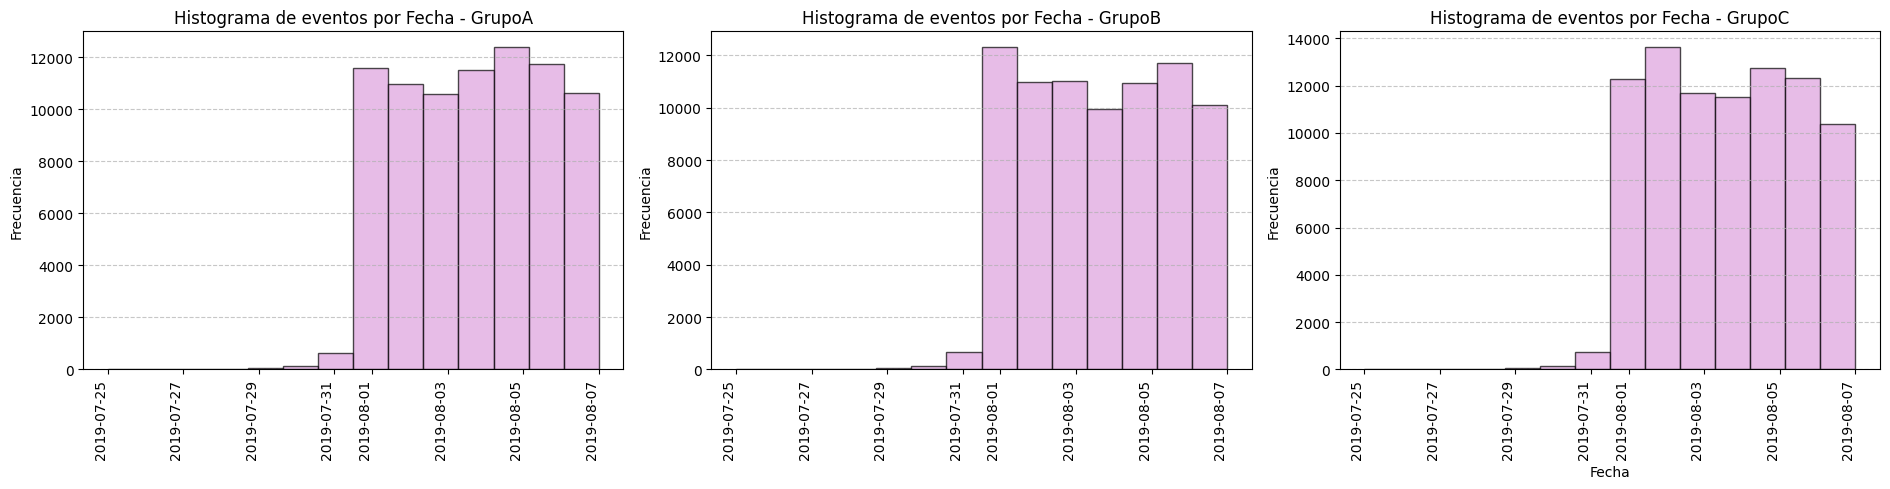

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharex=True)  # Tres filas, un gráfico por fila

# Histograma para GrupoA
axes[0].hist(GrupoA['fecha_eventos'], bins=len(GrupoA), weights=GrupoA['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[0].set_title('Histograma de eventos por Fecha - GrupoA')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoB
axes[1].hist(GrupoB['fecha_eventos'], bins=len(GrupoB), weights=GrupoB['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[1].set_title('Histograma de eventos por Fecha - GrupoB')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoC
axes[2].hist(GrupoC['fecha_eventos'], bins=len(GrupoC), weights=GrupoC['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[2].set_title('Histograma de eventos por Fecha - GrupoC')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño para evitar solapamientos
fig.autofmt_xdate(rotation=90)
plt.tight_layout()
plt.show()


**Observación:** Podemos observar que la consistencia entre la cantidad de eventos, se genera a partir del 01 de agosto, lo que tienden a sesgar nuestra gráfica. En ambos grupos la tendencia es bastante similar en ambos.

#### 2.1.6. Histograma por Hora

In [34]:
# seleccionar datos en el grupo 246
GrupoA = periodo_eventos_hora[periodo_eventos_hora['exp_id']=='246']

# seleccionar datos en el grupo 247
GrupoB = periodo_eventos_hora[periodo_eventos_hora['exp_id']=='247']

# seleccionar datos en el grupo 248
GrupoC = periodo_eventos_hora[periodo_eventos_hora['exp_id']=='248']


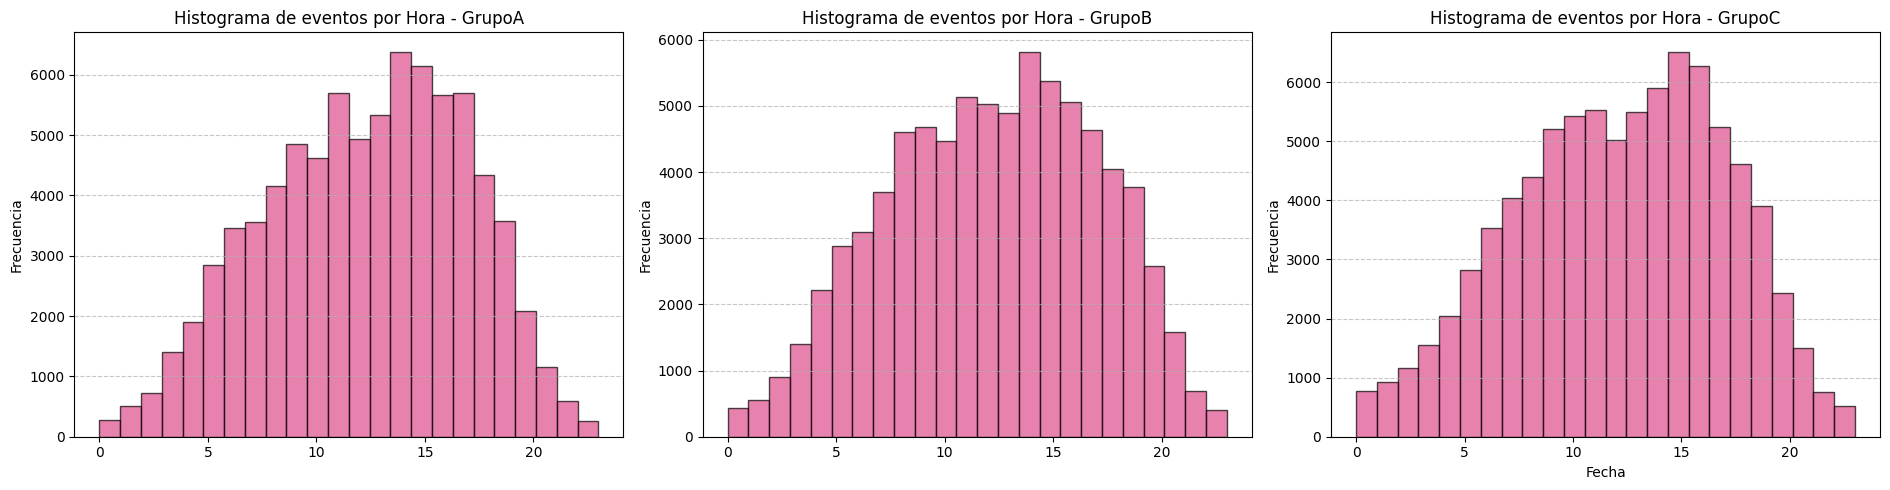

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharex=True)  # Tres filas, un gráfico por fila

# Histograma para GrupoA
axes[0].hist(GrupoA['hora'], bins=len(GrupoA), weights=GrupoA['conteo_eventos'], 
             color='#de4c8a', edgecolor='black', alpha=0.7)
axes[0].set_title('Histograma de eventos por Hora - GrupoA')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoB
axes[1].hist(GrupoB['hora'], bins=len(GrupoB), weights=GrupoB['conteo_eventos'], 
             color='#de4c8a', edgecolor='black', alpha=0.7)
axes[1].set_title('Histograma de eventos por Hora - GrupoB')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoC
axes[2].hist(GrupoC['hora'], bins=len(GrupoC), weights=GrupoC['conteo_eventos'], 
             color='#de4c8a', edgecolor='black', alpha=0.7)
axes[2].set_title('Histograma de eventos por Hora - GrupoC')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño para evitar solapamientos
plt.tight_layout()
plt.show()

**Observación:** Los tres grupos presentan una distribución con algunas variaciones en las frecuencias por hora similares. Vemos que las frecuencias más altas se posicionan entre las 14 y 15 horas, y las más bajas al principio (de 0 a 5 horas) y al final de histograma (20 a 23 horas).

#### Filtramos nuestros datos a partir de 2019-08-01 que es donde comienzan hacer consistentes nuestros datos

In [36]:
periodo_eventos['fecha_eventos'] = pd.to_datetime(periodo_eventos['fecha_eventos'])

# Filtramos nuestros datos a partir de 2019-08-01 

filtro_periodo = periodo_eventos[periodo_eventos['fecha_eventos']>='2019-08-01']

display(filtro_periodo)


,evento_nombre,usuario_id,hora_evento,exp_id,fecha_eventos,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21


In [37]:
# Agrupamos nuevamente nuestros datos para el periodo de tiempo que filtramos

periodo_filtro_fecha = filtro_periodo.groupby(['fecha_eventos','exp_id']).size().reset_index(name='conteo_eventos')
periodo_filtro_fecha.head(n=10)

,fecha_eventos,exp_id,conteo_eventos
0,2019-08-01,246,11561
1,2019-08-01,247,12306
2,2019-08-01,248,12274
3,2019-08-02,246,10946
4,2019-08-02,247,10990
5,2019-08-02,248,13618
6,2019-08-03,246,10575
7,2019-08-03,247,11024
8,2019-08-03,248,11683
9,2019-08-04,246,11514


#### 2.1.7. Histograma por Fecha (A partir del 2019-08-01)

In [38]:
# seleccionar datos en el grupo 246
GrupoA = periodo_filtro_fecha[periodo_filtro_fecha['exp_id']=='246']

# seleccionar datos en el grupo 247
GrupoB = periodo_filtro_fecha[periodo_filtro_fecha['exp_id']=='247']

# seleccionar datos en el grupo 248
GrupoC = periodo_filtro_fecha[periodo_filtro_fecha['exp_id']=='248']


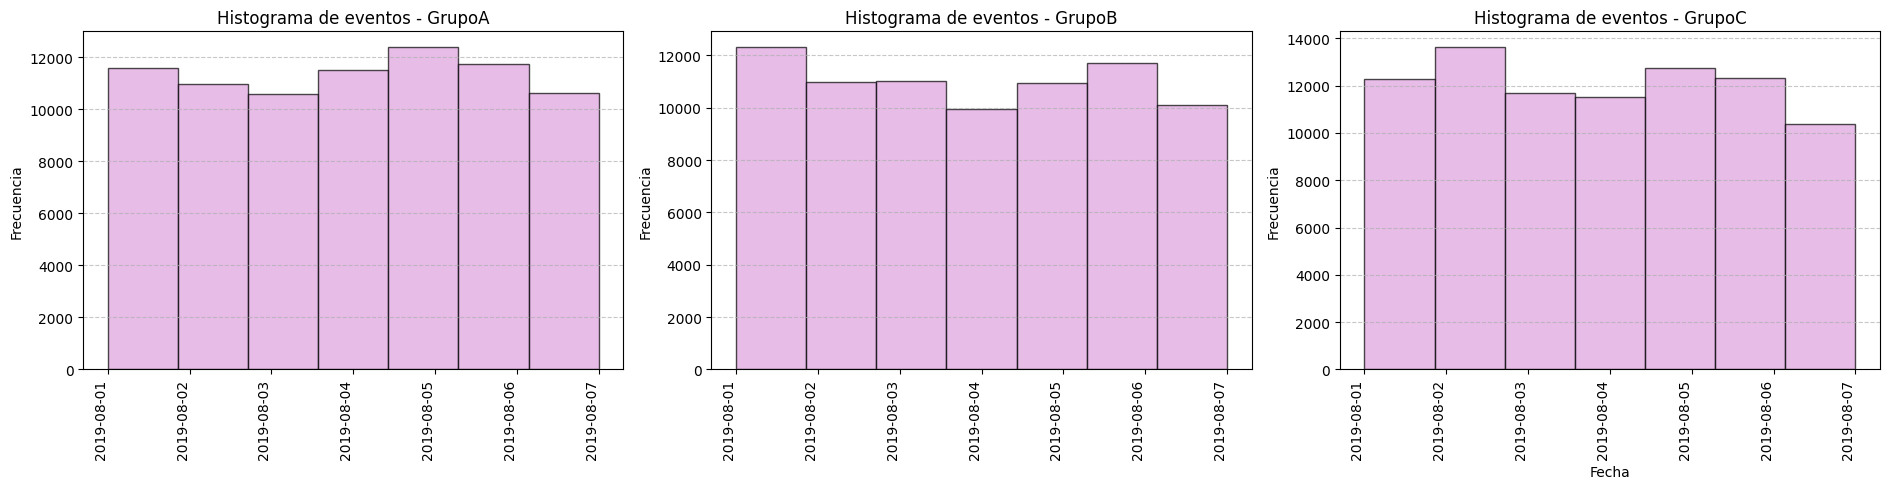

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(19, 5), sharex=True)  # Tres filas, un gráfico por fila

# Histograma para GrupoA
axes[0].hist(GrupoA['fecha_eventos'], bins=len(GrupoA), weights=GrupoA['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[0].set_title('Histograma de eventos - GrupoA')
axes[0].set_ylabel('Frecuencia')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoB
axes[1].hist(GrupoB['fecha_eventos'], bins=len(GrupoB), weights=GrupoB['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[1].set_title('Histograma de eventos - GrupoB')
axes[1].set_ylabel('Frecuencia')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Histograma para GrupoC
axes[2].hist(GrupoC['fecha_eventos'], bins=len(GrupoC), weights=GrupoC['conteo_eventos'], 
             color='plum', edgecolor='black', alpha=0.7)
axes[2].set_title('Histograma de eventos - GrupoC')
axes[2].set_xlabel('Fecha')
axes[2].set_ylabel('Frecuencia')
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar diseño para evitar solapamientos
fig.autofmt_xdate(rotation=90)
plt.tight_layout()
plt.show()

**Observación:** Los tres grupos presentan una distribución con algunas variaciones en las frecuencias por fecha similares. Sin embargo, las frecuencias más altas y más bajas no coinciden exactamente entre los grupos.

#### 2.1.8. ¿Perdiste muchos eventos y usuarios al excluir los datos más antiguos? Asegúrate de tener usuarios de los tres grupos experimentales.

In [40]:
# Agrupamos nuevamente tomando el nuevo periodo de fechas

eventos_usuarios = filtro_periodo.groupby(['evento_nombre','exp_id']).agg({'usuario_id': 'nunique', 'evento_nombre': 'size'})

eventos_usuarios.columns = ['usuario_por_evento','total_eventos_registrados']

display(eventos_usuarios)


usuario_por_evento  total_eventos_registrados
evento_nombre           exp_id                                               
CartScreenAppear        246                   1266                      14690
                        247                   1238                      12434
                        248                   1230                      15179
MainScreenAppear        246                   2450                      37676
                        247                   2476                      39090
                        248                   2493                      40562
OffersScreenAppear      246                   1542                      14767
                        247                   1520                      15179
                        248                   1531                      16387
PaymentScreenSuccessful 246                   1200                      11852
                        247                   1158                       9981
                        248                   1181                      12085
Tutorial                246                    278                        317
                        247                    283                        338
                        248                    279                        350

In [41]:
# Agrupamos nuevamente tomando el nuevo periodo de fechas

eventos_registros_total = filtro_periodo.copy()

# Agrupamos y sacamos los usuarios unicos por eventos y contamos la cantidad de veces que se repite cada evento

eventos_registros_total = eventos_registros_total.groupby(['evento_nombre','exp_id']).agg({'usuario_id': 'nunique', 'evento_nombre': 'size'})

eventos_registros_total.columns = ['usuario_por_evento','total_eventos_registrados']

display(eventos_registros_total)

usuario_por_evento  total_eventos_registrados
evento_nombre           exp_id                                               
CartScreenAppear        246                   1266                      14690
                        247                   1238                      12434
                        248                   1230                      15179
MainScreenAppear        246                   2450                      37676
                        247                   2476                      39090
                        248                   2493                      40562
OffersScreenAppear      246                   1542                      14767
                        247                   1520                      15179
                        248                   1531                      16387
PaymentScreenSuccessful 246                   1200                      11852
                        247                   1158                       9981
                        248                   1181                      12085
Tutorial                246                    278                        317
                        247                    283                        338
                        248                    279                        350

In [42]:
comparacion_de_registros = eventos_usuarios.merge(eventos_registros_total, on=['evento_nombre','exp_id'], how='inner', suffixes=['A', 'B'])
comparacion_de_registros['usuarios_perdidos'] = comparacion_de_registros['usuario_por_eventoB']-comparacion_de_registros['usuario_por_eventoA']
comparacion_de_registros['eventos_perdidos'] = comparacion_de_registros['total_eventos_registradosB'] - comparacion_de_registros['total_eventos_registradosA']

# Sacar porcentajes de usuarios y eventos (incluyendo todos nuestros grupos experimentales)

comparacion_de_registros['usuarios_perdidos_%'] = (comparacion_de_registros['usuarios_perdidos']/comparacion_de_registros['usuario_por_eventoB'])*100
comparacion_de_registros['eventos_perdidos_%'] = (comparacion_de_registros['eventos_perdidos']/comparacion_de_registros['total_eventos_registradosB'])*100

display(comparacion_de_registros)

usuario_por_eventoA  \
evento_nombre           exp_id                        
CartScreenAppear        246                    1266   
                        247                    1238   
                        248                    1230   
MainScreenAppear        246                    2450   
                        247                    2476   
                        248                    2493   
OffersScreenAppear      246                    1542   
                        247                    1520   
                        248                    1531   
PaymentScreenSuccessful 246                    1200   
                        247                    1158   
                        248                    1181   
Tutorial                246                     278   
                        247                     283   
                        248                     279   

                                total_eventos_registradosA  \
evento_nombre           exp_id                               
CartScreenAppear        246                          14690   
                        247                          12434   
                        248                          15179   
MainScreenAppear        246                          37676   
                        247                          39090   
                        248                          40562   
OffersScreenAppear      246                          14767   
                        247                          15179   
                        248                          16387   
PaymentScreenSuccessful 246                          11852   
                        247                           9981   
                        248                          12085   
Tutorial                246                            317   
                        247                            338   
                        248                            350   

                                usuario_por_eventoB  \
evento_nombre           exp_id                        
CartScreenAppear        246                    1266   
                        247                    1238   
                        248                    1230   
MainScreenAppear        246                    2450   
                        247                    2476   
                        248                    2493   
OffersScreenAppear      246                    1542   
                        247                    1520   
                        248                    1531   
PaymentScreenSuccessful 246                    1200   
                        247                    1158   
                        248                    1181   
Tutorial                246                     278   
                        247                     283   
                        248                     279   

                                total_eventos_registradosB  usuarios_perdidos  \
evento_nombre           exp_id                                                  
CartScreenAppear        246                          14690                  0   
                        247                          12434                  0   
                        248                          15179                  0   
MainScreenAppear        246                          37676                  0   
                        247                          39090                  0   
                        248                          40562                  0   
OffersScreenAppear      246                          14767                  0   
                        247                          15179                  0   
                        248                          16387                  0   
PaymentScreenSuccessful 246                          11852                  0   
                        247                           9981                  0   
                        248                         

**Observación:** Podemos observar que al excluir datos antiguos, no tenemos perdidas de usuarios ni tampoco de eventos para los 3 grupos experimentales.

# 3.1. Estudiar el embudo de eventos

#### 3.1.1. Observa qué eventos hay en los registros y su frecuencia de suceso. Ordénalos por frecuencia.

In [43]:
frecuencia_eventos = filtro_periodo.copy()

frecuencia_eventos = frecuencia_eventos.groupby('evento_nombre').agg({'evento_nombre': 'count'})

frecuencia_eventos.columns = ['frecuencia']

# Ordenamos por frecuencia

frecuencia_eventos = frecuencia_eventos.sort_values(by='frecuencia',ascending=False)

display(frecuencia_eventos)

,frecuencia
evento_nombre,
MainScreenAppear,117328
OffersScreenAppear,46333
CartScreenAppear,42303
PaymentScreenSuccessful,33918
Tutorial,1005


#### 3.1.2. Encuentra la cantidad de usuarios que realizaron cada una de estas acciones. Ordena los eventos por el número de usuarios. Calcula la proporción de usuarios que realizaron la acción al menos una vez.

In [44]:
cant_usuarios_por_evento = filtro_periodo.copy()

cant_usuarios_por_evento = cant_usuarios_por_evento.groupby('evento_nombre').agg({'usuario_id': 'nunique'}).sort_values(by='usuario_id', ascending=False)

display(cant_usuarios_por_evento)

,usuario_id
evento_nombre,
MainScreenAppear,7419
OffersScreenAppear,4593
CartScreenAppear,3734
PaymentScreenSuccessful,3539
Tutorial,840


In [45]:
total_usuarios_unicos = filtro_periodo['usuario_id'].nunique()
print(total_usuarios_unicos)

7534


In [46]:
proporcion = cant_usuarios_por_evento.copy()

# Calculamos proporicion de usuarios que es igual: 

proporcion['proporcion'] = proporcion['usuario_id']/total_usuarios_unicos

display(proporcion)

,usuario_id,proporcion
evento_nombre,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737
Tutorial,840,0.111495


#### 3.1.3 ¿En qué orden crees que ocurrieron las acciones? ¿Todas son parte de una sola secuencia? No es necesario tenerlas en cuenta al calcular el embudo.

- MainScreenAppear : Usuarios acceden a la pantalla principal de la app

- OffersScreenAppear : Página donde se encuentra las ofertas

- CartScreenAppear : Ocurre despues que los usuarios seleccionan productos y revisan carrito

- PaymentScreenSuccessful : Utilmo paso, para realizar pago de productos

Tutorial, por su naturaleza, no necesariamente está vinculado al flujo del embudo de conversión principal.

In [47]:
embudo = proporcion.copy()
embudo = embudo[:4]
display(embudo)

,usuario_id,proporcion
evento_nombre,,
MainScreenAppear,7419,0.984736
OffersScreenAppear,4593,0.609636
CartScreenAppear,3734,0.495620
PaymentScreenSuccessful,3539,0.469737


#### 3.1.4. Utiliza el embudo de eventos para encontrar la proporción de usuarios que pasan de una etapa a la siguiente. Por ejemplo, para la secuencia de eventos A → B → C, calcula la proporción de usuarios en la etapa B a la cantidad de usuarios en la etapa A y la proporción de usuarios en la etapa C a la cantidad en la etapa B.

In [48]:
proporcion_embudo = embudo.copy()

proporcion_embudo['proporcion_embudo']= embudo['usuario_id']/embudo['usuario_id'].shift()

display(proporcion_embudo)

,usuario_id,proporcion,proporcion_embudo
evento_nombre,,,
MainScreenAppear,7419,0.984736,NaN
OffersScreenAppear,4593,0.609636,0.619086
CartScreenAppear,3734,0.495620,0.812976
PaymentScreenSuccessful,3539,0.469737,0.947777


#### 3.1.5. ¿En qué etapa pierdes más usuarios?


Observamos que la parte de las ofertas es donde más se pierden usuarios, solo llegan un 61%.

#### 3.1.6. ¿Qué porcentaje de usuarios hace todo el viaje desde su primer evento hasta el pago?

Observamos que el 94% de los usuarios realizan el proceso hasta culminar el pago.

# 4.1. Estudiar los resultados del experimento

#### 4.1.1 ¿Cuántos usuarios hay en cada grupo?

In [49]:
usuarios_por_grupo = filtro_periodo.copy()

# Realizamos groupby por exp_id (para obtener cantidad de usuarios para cada grupo experimental)

usuarios_por_grupo  = usuarios_por_grupo.groupby('exp_id').agg({'usuario_id': 'nunique'})

display(usuarios_por_grupo)

,usuario_id
exp_id,
246,2484
247,2513
248,2537


#### 4.1.2 Tenemos dos grupos de control en el test A/A, donde comprobamos nuestros mecanismos y cálculos. Observa si hay una diferencia estadísticamente significativa entre las muestras 246 y 247.

Utilizaremos prueba Z, ya que queremos comparar proporciones de éxito entre dos grupos.


- En este caso seria bueno comparar la diferencia entre el exito del evento de pago **PaymentScreenSuccessful** para conocer la cantidad de usuarios que logran completar un pago exitoso. Esto nos podria permitir mejorar áreas y tomar decisiones futuras en los grupos experimentales, tomando como referencia el grupo experimental con mejores resultados.

In [50]:
filtro_grupos = filtro_periodo[filtro_periodo['exp_id'].isin(['246', '247'])]
display(filtro_grupos)

,evento_nombre,usuario_id,hora_evento,exp_id,fecha_eventos,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21


In [51]:
# Filtramos los grupos experimentales 246 y 247

grupo_246 = filtro_grupos[filtro_grupos['exp_id'] == '246']
grupo_247 = filtro_grupos[filtro_grupos['exp_id'] == '247']


In [52]:
# Filtramos por evento deseado (Total de éxitos grupo 246 y 247)

exito246 = filtro_grupos[(filtro_grupos['evento_nombre'] == 'PaymentScreenSuccessful') & (filtro_grupos['exp_id'] == '246')]
exito247 = filtro_grupos[(filtro_grupos['evento_nombre'] == 'PaymentScreenSuccessful') & (filtro_grupos['exp_id'] == '247')]

# Total de usuarios únicos en cada grupo

total_246 = grupo_246['usuario_id'].nunique()
total_247 = grupo_247['usuario_id'].nunique()


# Agrupamos por grupo experimental y calculamos los usuarios unicos para cada uno

exito246  = exito246.groupby('exp_id').agg({'usuario_id': 'nunique'})
exito247  = exito247.groupby('exp_id').agg({'usuario_id': 'nunique'})

# Renombramos columna

exito246.columns = ['total_exitos']
exito247.columns = ['total_exitos']

# Exraemos el valor unicamente de las columnas

exito246 = exito246['total_exitos'].values[0]
exito247 = exito247['total_exitos'].values[0]


print('Total de exitos del grupo exp 246:', exito246)
print('Total de exitos del grupo exp 247:', exito247)

print()

print('Total de usuarios del grupo exp 246:',total_246)
print('Total de usuarios del grupo exp 247:',total_247)


Total de exitos del grupo exp 246: 1200
Total de exitos del grupo exp 247: 1158

Total de usuarios del grupo exp 246: 2484
Total de usuarios del grupo exp 247: 2513


<div class="alert alert-block alert-info">
<b>Hipótesis Nula (H₀): Las muestras 246 y 247 son estadísticamente iguales.</b>
<b>Alternativa (H₁): Existe una diferencia estadísticamente significativa entre las muestras 246 y 247</b>
<b>Nivel de significancia: α = 0.05</b>
<a class="tocSkip"></a>
</div>

In [91]:
# Proporciones individuales

p1 = exito246 / total_246
p2 = exito247 / total_247

# Proporción combinada

p_combined = (exito246 + exito247) / (total_246 + total_247)

# Diferencia entre proporciones

difference = p1 - p2

# Error estándar

SE = np.sqrt(p_combined * (1 - p_combined) * (1/total_246 + 1/total_247))


# Umbral de significancia

alpha = 0.05

# Estadístico Z

z_score = difference / SE

# p-valor (bilateral)

p_value = 2 * (1 - norm.cdf(abs(z_score)))

# Resultado

print(f"Diferencia entre proporciones: {difference:.4f}")
print(f"Estadístico Z: {z_score:.4f}")
print(f"P-valor: {p_value:.4f}")

# Conclusión

if p_value < alpha:
    print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras 246 y 247.")
else:
    print("No podemos rechazar la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras 246 y 247 son significativamente diferentes.")


Diferencia entre proporciones: 0.0223
Estadístico Z: 1.5780
P-valor: 0.1146
No podemos rechazar la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras 246 y 247 son significativamente diferentes.


**Observación:** La prueba nos indica que ambos grupos se comportan de forma similar en cuanto al evento de éxito en la pantalla de pago. Ambos segmentos están logrando pagos con éxito de forma consistente.

#### 4.1.3. Selecciona el evento más popular. En cada uno de los grupos de control, encuentra la cantidad de usuarios que realizaron esta acción. Encuentra su proporción. Comprueba si la diferencia entre los grupos es estadísticamente significativa. Repite el procedimiento para todos los demás eventos (ahorrarás tiempo si creas una función especial para esta prueba). ¿Puedes confirmar que los grupos se dividieron correctamente?

In [54]:
# Agrupamos nuevamente tomando el nuevo periodo de fechas (A partir del 2019-08-01)

eventos_mas_popular = filtro_periodo.groupby(['evento_nombre','exp_id']).agg({'usuario_id': 'nunique'}).sort_values(by='usuario_id', ascending=False)

eventos_mas_popular.columns = ['usuario_por_evento']

display(eventos_mas_popular)


usuario_por_evento
evento_nombre           exp_id                    
MainScreenAppear        248                   2493
                        247                   2476
                        246                   2450
OffersScreenAppear      246                   1542
                        248                   1531
                        247                   1520
CartScreenAppear        246                   1266
                        247                   1238
                        248                   1230
PaymentScreenSuccessful 246                   1200
                        248                   1181
                        247                   1158
Tutorial                247                    283
                        248                    279
                        246                    278

In [55]:
# Total de usuarios unicos de los grupos 

total_usuarios_unicos = filtro_periodo['usuario_id'].nunique()

print(total_usuarios_unicos)

7534


In [56]:
# Calculamos proporicion de usuarios por evento en cada grupo experimental

proporcion = eventos_mas_popular.copy()

proporcion['proporcion'] = proporcion['usuario_por_evento']/total_usuarios_unicos

display(proporcion)

usuario_por_evento  proporcion
evento_nombre           exp_id                                
MainScreenAppear        248                   2493    0.330900
                        247                   2476    0.328643
                        246                   2450    0.325192
OffersScreenAppear      246                   1542    0.204672
                        248                   1531    0.203212
                        247                   1520    0.201752
CartScreenAppear        246                   1266    0.168038
                        247                   1238    0.164322
                        248                   1230    0.163260
PaymentScreenSuccessful 246                   1200    0.159278
                        248                   1181    0.156756
                        247                   1158    0.153703
Tutorial                247                    283    0.037563
                        248                    279    0.037032
                        246                    278    0.036899

In [57]:
# Restablecer los índices como columnas

proporcion.reset_index(inplace=True)


In [58]:
# Filtrar solo el evento 'MainScreenAppear'

filtro_evento = proporcion[proporcion['evento_nombre'] == 'MainScreenAppear']

display(filtro_evento)

,evento_nombre,exp_id,usuario_por_evento,proporcion
0,MainScreenAppear,248,2493,0.330900
1,MainScreenAppear,247,2476,0.328643
2,MainScreenAppear,246,2450,0.325192


**Observación:**  El evento mas popular es MainScreenAppear : Usuarios acceden a la pantalla principal de la app. 

- Para el grupo experimental 248 la proporción fue de 33.09%
- Para el grupo experimental 247 la proporción fue de 32.86%
- Para el grupo experimental 246 la proporción fue de 32.52%

In [59]:
data_pruebaChi = proporcion.copy()

data_pruebaChi['total_usuarios_evento'] = total_usuarios_unicos

# Calcular cantidad de usuarios que no realizaron eventos

data_pruebaChi['no_realizaron_evento'] = (data_pruebaChi['total_usuarios_evento'] - data_pruebaChi['usuario_por_evento'])


In [62]:
data_pruebaChi = data_pruebaChi[['evento_nombre','exp_id','usuario_por_evento','no_realizaron_evento']]

display(data_pruebaChi)

,evento_nombre,exp_id,usuario_por_evento,no_realizaron_evento
0,MainScreenAppear,248,2493,5041
1,MainScreenAppear,247,2476,5058
2,MainScreenAppear,246,2450,5084
3,OffersScreenAppear,246,1542,5992
4,OffersScreenAppear,248,1531,6003
5,OffersScreenAppear,247,1520,6014
6,CartScreenAppear,246,1266,6268
7,CartScreenAppear,247,1238,6296
8,CartScreenAppear,248,1230,6304
9,PaymentScreenSuccessful,246,1200,6334


Se realiza prueba Chi para:

- Medir la relación entre la cantidad de usuarios que realizaron el evento y la cantidad que no lo hizo.

- Analizar independencia entre 2 categorias.

- Detectar diferencias significativas en comportamiento entre si de los grupos.

#### - Realizamos prueba Chi cuadrado para todos los eventos

In [87]:
# Función para realizar prueba Chi-cuadrado por evento

def chi_square_test_per_event(data_pruebaChi):
    results = {}
    for event in data_pruebaChi['evento_nombre'].unique():
        event_data = data_pruebaChi[data_pruebaChi['evento_nombre'] == event][['usuario_por_evento', 'no_realizaron_evento']]
        chi2, p_value, _, _ = chi2_contingency(event_data)


    # Evaluar el valor p
        
        if p_value < 0.05:
            message = "Hay una diferencia estadísticamente significativa entre las proporciones de los grupos."
        else:
            message = "No hay una diferencia estadísticamente significativa entre las proporciones de los grupos."

        
    # Formatear los resultados
        
        significant = p_value < 0.05
        results[event] = {
            'Chi-cuadrado': float(round(chi2, 3)),
            'Valor p': float(round(p_value, 4)),
            'Significativo': "Sí" if p_value < 0.05 else "No",
            'Mensaje': message
        }
    return results

# Ejecutar la función con datos de prueba

chi_square_results_with_message = chi_square_test_per_event(data_pruebaChi)

chi_square_results_with_message


{'MainScreenAppear': {'Chi-cuadrado': 0.565,
  'Valor p': 0.754,
  'Significativo': 'No',
  'Mensaje': 'No hay una diferencia estadísticamente significativa entre las proporciones de los grupos.'},
 'OffersScreenAppear': {'Chi-cuadrado': 0.198,
  'Valor p': 0.9056,
  'Significativo': 'No',
  'Mensaje': 'No hay una diferencia estadísticamente significativa entre las proporciones de los grupos.'},
 'CartScreenAppear': {'Chi-cuadrado': 0.688,
  'Valor p': 0.709,
  'Significativo': 'No',
  'Mensaje': 'No hay una diferencia estadísticamente significativa entre las proporciones de los grupos.'},
 'PaymentScreenSuccessful': {'Chi-cuadrado': 0.889,
  'Valor p': 0.6411,
  'Significativo': 'No',
  'Mensaje': 'No hay una diferencia estadísticamente significativa entre las proporciones de los grupos.'},
 'Tutorial': {'Chi-cuadrado': 0.052,
  'Valor p': 0.9744,
  'Significativo': 'No',
  'Mensaje': 'No hay una diferencia estadísticamente significativa entre las proporciones de los grupos.'}}

**Observación:**

- Podemos confirmar que los grupos si se dividieron correctamente.
- En todos los eventos analizados, el mensaje indica que no hay una diferencia estadísticamente significativa entre las proporciones de los grupos. Esto implica que los patrones observados entre los grupos pueden explicarse por el azar, sin una variación importante en la frecuencia de aparición de estos eventos.

#### 4.1.4. Haz lo mismo para el grupo con fuentes alteradas. Compara los resultados con los de cada uno de los grupos de control para cada evento de forma aislada. Compara los resultados con los resultados combinados de los grupos de control. ¿Qué conclusiones puedes sacar del experimento?

In [64]:
filtro_grupos = filtro_periodo[filtro_periodo['exp_id'].isin(['246', '247','248'])]
display(filtro_grupos)

,evento_nombre,usuario_id,hora_evento,exp_id,fecha_eventos,hora
2828,Tutorial,3737462046622621720,2019-08-01 00:07:28,246,2019-08-01,0
2829,MainScreenAppear,3737462046622621720,2019-08-01 00:08:00,246,2019-08-01,0
2830,MainScreenAppear,3737462046622621720,2019-08-01 00:08:55,246,2019-08-01,0
2831,OffersScreenAppear,3737462046622621720,2019-08-01 00:08:58,246,2019-08-01,0
2832,MainScreenAppear,1433840883824088890,2019-08-01 00:08:59,247,2019-08-01,0
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07,21
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07,21
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07,21
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07,21


In [65]:
# Filtramos los grupos experimentales 246 y 247

grupo_246 = filtro_grupos[filtro_grupos['exp_id'] == '246']
grupo_247 = filtro_grupos[filtro_grupos['exp_id'] == '247']
grupo_248 = filtro_grupos[filtro_grupos['exp_id'] == '248']

# Total de usuarios únicos en cada grupo

total_246 = grupo_246['usuario_id'].nunique()
total_247 = grupo_247['usuario_id'].nunique()
total_248 = grupo_248['usuario_id'].nunique()

print(total_246)
print(total_247)
print(total_248)

2484
2513
2537


In [66]:
# Variable de ejemplo: total de usuarios en cada grupo

total_usuarios_por_grupo = {
    246: 2484,
    247: 2513,
    248: 2537
}

In [67]:
filtros_eventos_aislados = proporcion.copy()

# Convertir exp_id a tipo int

filtros_eventos_aislados['exp_id'] = filtros_eventos_aislados['exp_id'].astype(int)

# Crear nueva columna con el total de usuarios basado en el grupo

filtros_eventos_aislados['total_usuarios'] = filtros_eventos_aislados['exp_id'].map(total_usuarios_por_grupo)

display(filtros_eventos_aislados)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
0,MainScreenAppear,248,2493,0.330900,2537
1,MainScreenAppear,247,2476,0.328643,2513
2,MainScreenAppear,246,2450,0.325192,2484
3,OffersScreenAppear,246,1542,0.204672,2484
4,OffersScreenAppear,248,1531,0.203212,2537
5,OffersScreenAppear,247,1520,0.201752,2513
6,CartScreenAppear,246,1266,0.168038,2484
7,CartScreenAppear,247,1238,0.164322,2513
8,CartScreenAppear,248,1230,0.163260,2537
9,PaymentScreenSuccessful,246,1200,0.159278,2484


#### Comparaciones para el grupo con fuentes alteradas (248)

#### ***Evento: MainScreenAppear***     

In [74]:
evento_ms = filtros_eventos_aislados.copy()

evento_ms = filtros_eventos_aislados[filtros_eventos_aislados['evento_nombre'] == 'MainScreenAppear']

evento_ms = evento_ms.drop(columns=['index'],errors='ignore')

display(evento_ms)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
0,MainScreenAppear,248,2493,0.330900,2537
1,MainScreenAppear,247,2476,0.328643,2513
2,MainScreenAppear,246,2450,0.325192,2484


In [75]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.05):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (2493, 2537, 2450, 2484),
    (2493, 2537, 2476, 2513),
    (2493, 2537, 4926, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(2493, 2537, 2450, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(2493, 2537, 2476, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(2493, 2537, 4926, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0037
Estadístico Z: -1.0473
P-valor: 0.2950
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0026
Estadístico Z: -0.7410
P-valor: 0.4587
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0031
Estadístico Z: -1.0489
P-valor: 0.2942
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: OffersScreenAppear***  

In [78]:
evento_os = filtros_eventos_aislados.copy()

evento_os = filtros_eventos_aislados[filtros_eventos_aislados['evento_nombre'] == 'OffersScreenAppear']

evento_os = evento_os.drop(columns=['index'],errors='ignore')

display(evento_os)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
3,OffersScreenAppear,246,1542,0.204672,2484
4,OffersScreenAppear,248,1531,0.203212,2537
5,OffersScreenAppear,247,1520,0.201752,2513


In [77]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.05):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1531, 2537, 1542, 2484),
    (1531, 2537, 1520, 2513),
    (1531, 2537, 3062, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1531, 2537, 1542, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1531, 2537, 1520, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1531, 2537, 3062, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0173
Estadístico Z: -1.2581
P-valor: 0.2084
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0014
Estadístico Z: -0.1007
P-valor: 0.9198
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0093
Estadístico Z: -0.7819
P-valor: 0.4343
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: CartScreenAppear***  


In [79]:
evento_ca = filtros_eventos_aislados.copy()

evento_ca = filtros_eventos_aislados[filtros_eventos_aislados['evento_nombre'] == 'CartScreenAppear']

evento_ca = evento_ca.drop(columns=['index'],errors='ignore')

display(evento_ca)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
6,CartScreenAppear,246,1266,0.168038,2484
7,CartScreenAppear,247,1238,0.164322,2513
8,CartScreenAppear,248,1230,0.163260,2537


In [80]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.05):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1230, 2537, 1266, 2484),
    (1230, 2537, 1238, 2513),
    (1230, 2537, 2504, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1230, 2537, 1266, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1230, 2537, 1238, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1230, 2537, 2504, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0248
Estadístico Z: -1.7599
P-valor: 0.0784
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0078
Estadístico Z: -0.5554
P-valor: 0.5786
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0163
Estadístico Z: -1.3354
P-valor: 0.1818
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: PaymentScreenSuccessful***


In [81]:
evento_ps = filtros_eventos_aislados.copy()

evento_ps = filtros_eventos_aislados[filtros_eventos_aislados['evento_nombre'] == 'PaymentScreenSuccessful']

evento_ps = evento_ps.drop(columns=['index'],errors='ignore')

display(evento_ps)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
9,PaymentScreenSuccessful,246,1200,0.159278,2484
10,PaymentScreenSuccessful,248,1181,0.156756,2537
11,PaymentScreenSuccessful,247,1158,0.153703,2513


In [82]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.05):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1181, 2537, 1200, 2484),
    (1181, 2537, 1158, 2513),
    (1181, 2537, 2358, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1181, 2537, 1200, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1181, 2537, 1158, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1181, 2537, 2358, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0176
Estadístico Z: -1.2474
P-valor: 0.2123
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: 0.0047
Estadístico Z: 0.3354
P-valor: 0.7373
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0064
Estadístico Z: -0.5238
P-valor: 0.6004
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: Tutorial***

In [83]:
evento_t = filtros_eventos_aislados.copy()

evento_t = filtros_eventos_aislados[filtros_eventos_aislados['evento_nombre'] == 'Tutorial']

evento_t = evento_t.drop(columns=['index'],errors='ignore')

display(evento_t)

,evento_nombre,exp_id,usuario_por_evento,proporcion,total_usuarios
12,Tutorial,247,283,0.037563,2513
13,Tutorial,248,279,0.037032,2537
14,Tutorial,246,278,0.036899,2484


In [84]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.05):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (279, 2537, 278, 2484),
    (279, 2537, 283, 2513),
    (279, 2537, 561, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(279, 2537, 278, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(279, 2537, 283, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(279, 2537, 561, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0019
Estadístico Z: -0.2193
P-valor: 0.8264
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0026
Estadístico Z: -0.2985
P-valor: 0.7653
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0023
Estadístico Z: -0.2991
P-valor: 0.7649
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


**Observación:** 

- Observamos que usando que para nuestros grupos un nivel de significancia estadística de 0.05, no hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

- Las diferencias entre las proporciones son muy pequeñas y estadísticamente no significativas. 

#### 4.1.5. ¿Qué nivel de significancia has establecido para probar las hipótesis estadísticas mencionadas anteriormente? Calcula cuántas pruebas de hipótesis estadísticas has realizado. Con un nivel de significancia estadística de 0.1, uno de cada 10 resultados podría ser falso. ¿Cuál debería ser el nivel de significancia? Si deseas cambiarlo, vuelve a ejecutar los pasos anteriores y comprueba tus conclusiones

- Nivel de significancia establecido anteriormente: 0.05
- Pruebas de hipótesis Realizadas anteriormente: 14

#### ***Evento: MainScreenAppear***  

In [69]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.1):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (2493, 2537, 2450, 2484),
    (2493, 2537, 2476, 2513),
    (2493, 2537, 4926, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(2493, 2537, 2450, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(2493, 2537, 2476, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(2493, 2537, 4926, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0037
Estadístico Z: -1.0473
P-valor: 0.2950
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0026
Estadístico Z: -0.7410
P-valor: 0.4587
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0031
Estadístico Z: -1.0489
P-valor: 0.2942
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: OffersScreenAppear***  

In [70]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.1):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1531, 2537, 1542, 2484),
    (1531, 2537, 1520, 2513),
    (1531, 2537, 3062, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1531, 2537, 1542, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1531, 2537, 1520, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1531, 2537, 3062, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0173
Estadístico Z: -1.2581
P-valor: 0.2084
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0014
Estadístico Z: -0.1007
P-valor: 0.9198
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0093
Estadístico Z: -0.7819
P-valor: 0.4343
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: CartScreenAppear***  

In [71]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.1):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1230, 2537, 1266, 2484),
    (1230, 2537, 1238, 2513),
    (1230, 2537, 2504, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1230, 2537, 1266, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1230, 2537, 1238, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1230, 2537, 2504, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0248
Estadístico Z: -1.7599
P-valor: 0.0784
Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0078
Estadístico Z: -0.5554
P-valor: 0.5786
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0163
Estadístico Z: -1.3354
P-valor: 0.1818
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: PaymentScreenSuccessful***


In [72]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.1):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (1181, 2537, 1200, 2484),
    (1181, 2537, 1158, 2513),
    (1181, 2537, 2358, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(1181, 2537, 1200, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(1181, 2537, 1158, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(1181, 2537, 2358, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0176
Estadístico Z: -1.2474
P-valor: 0.2123
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: 0.0047
Estadístico Z: 0.3354
P-valor: 0.7373
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0064
Estadístico Z: -0.5238
P-valor: 0.6004
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### ***Evento: Tutorial***

In [73]:
def calcular_diferencia_proporciones(muestra1_exitos, muestra1_total, muestra2_exitos, muestra2_total, alpha=0.1):
   
    # Calcular proporciones individuales
    p1 = muestra1_exitos / muestra1_total
    p2 = muestra2_exitos / muestra2_total

    # Calcular proporción combinada
    p_combined = (muestra1_exitos + muestra2_exitos) / (muestra1_total + muestra2_total)

    # Calcular diferencia entre proporciones
    difference = p1 - p2

    # Calcular error estándar
    SE = np.sqrt(p_combined * (1 - p_combined) * (1/muestra1_total + 1/muestra2_total))

    # Calcular estadístico Z
    z_score = difference / SE

    # Calcular p-valor (bilateral)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Imprimir resultados
    print(f"\nComparación entre proporciones")
    print(f"Diferencia entre proporciones: {difference:.4f}")
    print(f"Estadístico Z: {z_score:.4f}")
    print(f"P-valor: {p_value:.4f}")

    # Conclusión
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: Existe una diferencia estadísticamente significativa entre las muestras.")
    else:
        print("No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.")

# Datos de las tres comparaciones
comparaciones = [
    (279, 2537, 278, 2484),
    (279, 2537, 283, 2513),
    (279, 2537, 561, 4997)
]

# Ejecutar la función para cada comparación
print("\nComparación 248 vs 246:")
calcular_diferencia_proporciones(279, 2537, 278, 2484)

print("\nComparación 248 vs 247:")
calcular_diferencia_proporciones(279, 2537, 283, 2513)

print("\nComparación 248 vs Contro Combinado:")
calcular_diferencia_proporciones(279, 2537, 561, 4997)


Comparación 248 vs 246:

Comparación entre proporciones
Diferencia entre proporciones: -0.0019
Estadístico Z: -0.2193
P-valor: 0.8264
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs 247:

Comparación entre proporciones
Diferencia entre proporciones: -0.0026
Estadístico Z: -0.2985
P-valor: 0.7653
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

Comparación 248 vs Contro Combinado:

Comparación entre proporciones
Diferencia entre proporciones: -0.0023
Estadístico Z: -0.2991
P-valor: 0.7649
No rechazamos la hipótesis nula: No hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.


#### 5.1 Conclusiones


- Observamos que aun realizando cambios en el nivel de significancia estadística a 0.1, no hay suficiente evidencia estadística para concluir que las muestras son significativamente diferentes.

- Las diferencias entre las proporciones siguen arrojando que son muy pequeñas y estadísticamente no significativas.

- Los usuarios no parecen estar abandonando la página, fallando en completar eventos importantes o interactuando de forma diferente respecto al diseño anterior. Esto sugiere que el diseño no está generando una barrera importante en el comportamiento de los usuarios.

- Aunque no se detectaron diferencias en los eventos medidos, esto no descarta por completo la posibilidad de que algunos usuarios perciban el diseño como intimidante, por lo que se recomienda monitorear continuamente el comportamiento después del lanzamiento. Seguir realizando seguimiento a las tasas de conversión o comentarios o feedback de los clientes. Dicha recomendación se sugiere tomando en consideración preocupaciones de la gerencia.